
# Module 3: Model Evaluation and Metrics

**Learning Objectives**
- Understand why evaluation is essential for classification models.
- Build and read a confusion matrix, and compute accuracy, precision, recall, F1, and false positive rate.
- Explore how decision thresholds change precision and recall.
- Understand ROC curves and AUC, and interpret their meaning.



## The Flow of Model Evaluation

When a classifier makes predictions, we need to measure how good those predictions are. The workflow is:

1. Train a classifier on labeled data.
2. Compare predictions to the true labels.
3. Build a confusion matrix to count outcomes.
4. Compute metrics derived from the confusion matrix.
5. Adjust thresholds to study trade-offs between errors.
6. Visualize ranking quality with ROC and compute AUC.
7. Interpret results to guide future improvements.



## Confusion Matrix and Terminology

A confusion matrix counts how many predictions fall into four categories.

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)  |
| **Actual Negative** | False Positive (FP)  | True Negative (TN)   |

- **True Positive (TP)**: predicted positive and actually positive.
- **False Positive (FP)**: predicted positive but actually negative.
- **True Negative (TN)**: predicted negative and actually negative.
- **False Negative (FN)**: predicted negative but actually positive.



## Metrics From The Confusion Matrix

Each metric answers a different question. In the formulas below, all terms come from the confusion matrix counts: $TP$, $FP$, $TN$, $FN$. The denominator of each fraction is the number of cases relevant to that question.

**Accuracy - How often are we correct overall.**
$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
$$
- Numerator: total correct predictions.
- Denominator: total number of predictions.

**Precision - When we predict positive, how often is that correct.**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
- Numerator: correct positives.
- Denominator: all predicted positives. A high value means few false alarms.

**Recall - Among actual positives, how many did we catch.**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
- Numerator: correct positives.
- Denominator: all actual positives. A high value means we miss few positives.

**False Positive Rate - Among actual negatives, how many did we incorrectly call positive.**
$$
\text{FPR} = \frac{FP}{FP + TN}
$$
- Numerator: false alarms.
- Denominator: all actual negatives.

**F1 Score - Single score balancing precision and recall.**
$$
F_1 = 2 \times \frac{(\text{Precision} \times \text{Recall})}{(\text{Precision} + \text{Recall})}
$$
- Harmonic mean penalizes uneven precision and recall.


### Harmonic mean

The harmonic mean is useful for averaging rates/ratios. It is the reciprocal of the arithmetic mean of reciprocals.

Formula (n positive values):
$$
H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}
$$

Terms:
- n: number of values
- x_i: the i-th value (i = 1,...,n)
- Σ: sum over i

Two-value case (connects to F1):
$$
\mathrm{HM}(x, y) = \frac{2xy}{x + y}
$$

Because it is dominated by the smaller value, it penalizes imbalance (e.g., low precision or low recall lowers F1).


## Manual Example - Student Dataset

We reuse a small set of predictions so the math is easy to follow.

| Student | Hours Studied | Attendance (%) | Actual | Predicted |
|----------|---------------|----------------|--------|-----------|
| A | 2 | 40 | Fail | Fail |
| B | 3 | 60 | Fail | Pass |
| C | 4 | 70 | Fail | Pass |
| D | 6 | 75 | Pass | Pass |
| E | 7 | 80 | Pass | Pass |
| F | 8 | 90 | Pass | Pass |
| G | 9 | 95 | Pass | Pass |
| H | 5 | 50 | Fail | Fail |
| I | 3 | 55 | Fail | Fail |
| J | 4 | 60 | Fail | Fail |

From this table:
- $TP = 4$
- $FP = 2$
- $TN = 4$
- $FN = 0$

Now compute each metric by substituting the numbers.

**Accuracy**
$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN} = \frac{4 + 4}{4 + 2 + 4 + 0} = \frac{8}{10} = 0.8
$$

**Precision**
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{4}{4 + 2} = \frac{4}{6} = 0.667
$$

**Recall**
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{4}{4 + 0} = 1.0
$$

**F1 Score**
$$
F_1 = 2 \times \frac{(0.667 \times 1.0)}{(0.667 + 1.0)} = 0.8
$$

**False Positive Rate**
$$
\text{FPR} = \frac{FP}{FP + TN} = \frac{2}{2 + 4} = \frac{2}{6} = 0.333
$$

Interpretation: this model catches all actual Pass students (high recall) but raises some false alarms for Pass (moderate precision).


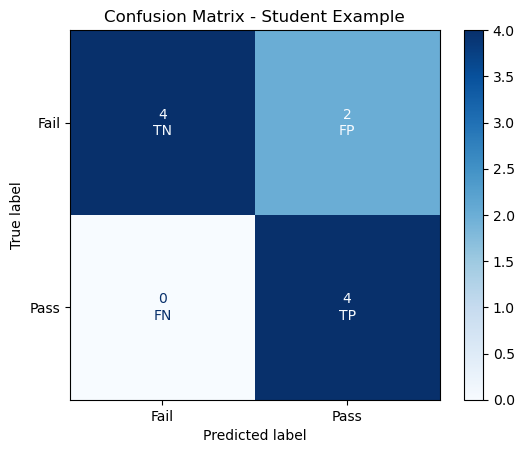

Accuracy: 0.8
Precision: 0.667
Recall: 1.0
F1 Score: 0.8
False Positive Rate: 0.333


In [4]:

# Compute confusion matrix and metrics for the manual student example
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Actual":    ["Fail","Fail","Fail","Pass","Pass","Pass","Pass","Fail","Fail","Fail"],
    "Predicted": ["Fail","Pass","Pass","Pass","Pass","Pass","Pass","Fail","Fail","Fail"]
})

# Encode as 0 and 1
y_true = df["Actual"].map({"Fail":0,"Pass":1}).values
y_pred = df["Predicted"].map({"Fail":0,"Pass":1}).values

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail","Pass"])
disp.plot(cmap="Blues")
# Add TP/TN/FP/FN labels under counts
ax = disp.ax_
labels_2x2 = [["TN","FP"], ["FN","TP"]]
for i, text in enumerate(ax.texts):
    r, c = divmod(i, 2)
    text.set_text(f"{text.get_text()}\n{labels_2x2[r][c]}")
    text.set_va("center")
plt.title("Confusion Matrix - Student Example")
plt.show()

# Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
fpr = cm[0,1] / (cm[0,1] + cm[0,0])

print("Accuracy:", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))
print("F1 Score:", round(f1, 3))
print("False Positive Rate:", round(fpr, 3))



## Precision and Recall Trade-Off Through Thresholds

If a classifier produces a probability score, we can vary the threshold to decide when to predict positive.
- Higher threshold usually increases precision and decreases recall.
- Lower threshold usually increases recall and decreases precision.

Below we simulate this effect on the student example with a small vector of probabilities.


In [6]:

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Simulated predicted probabilities for the 10 students, aligned with y_true above
# Larger numbers indicate higher confidence for Pass
probs = np.array([0.20, 0.55, 0.60, 0.85, 0.90, 0.88, 0.92, 0.25, 0.35, 0.40])

thresholds = [0.3, 0.5, 0.7, 0.9]
rows = []
for t in thresholds:
    preds = (probs >= t).astype(int)
    rows.append({
        "Threshold": t,
        "Precision": precision_score(y_true, preds),
        "Recall": recall_score(y_true, preds),
        "F1": f1_score(y_true, preds)
    })

thr_table = pd.DataFrame(rows)
print(thr_table.to_string(index=False))


 Threshold  Precision  Recall       F1
       0.3   0.500000     1.0 0.666667
       0.5   0.666667     1.0 0.800000
       0.7   1.000000     1.0 1.000000
       0.9   1.000000     0.5 0.666667



Interpretation: as the threshold increases, precision typically goes up because we only call high confidence cases positive, but recall falls because we miss more actual positives. The F1 score shows where the balance is best.



## ROC Curve and AUC

The ROC curve plots True Positive Rate on the y axis against False Positive Rate on the x axis for all possible thresholds.

Definitions:
$$
\text{TPR} = \frac{TP}{TP + FN} \quad \text{and} \quad \text{FPR} = \frac{FP}{FP + TN}
$$

The AUC is the area under the ROC curve. An AUC near 1 means the model ranks positives ahead of negatives most of the time.



## Titanic-style Dataset Example

To mimic the Titanic setting without external data files, we will synthesize a small dataset with similar structure. We will generate features `age`, `fare`, and `sex_num` and create a survival label that depends on these variables with noise. This is for illustration, not for historical accuracy.


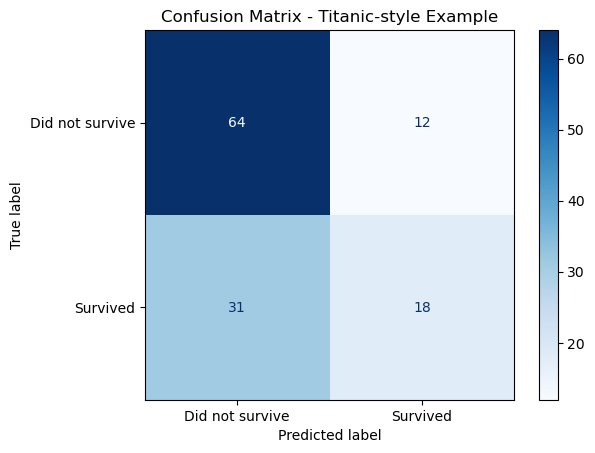

Titanic-style Metrics
---------------------
Accuracy: 0.656
Precision: 0.600
Recall: 0.367
F1 Score: 0.456
AUC: 0.669


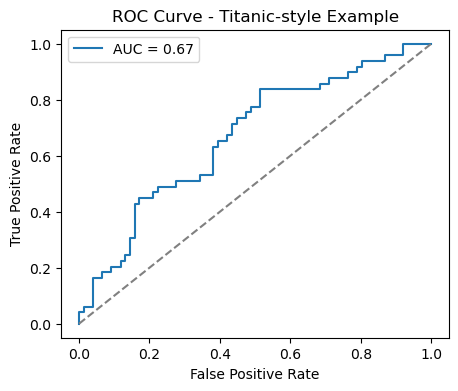

In [8]:

# Create a synthetic Titanic-style dataset
rng = np.random.default_rng(42)
n = 500

age = rng.normal(30, 14, size=n).clip(1, 80)
fare = rng.gamma(shape=2.0, scale=20.0, size=n).clip(5, 250)
sex_num = rng.integers(0, 2, size=n)  # 0 = male, 1 = female

# Survival probability model: females and higher fare slightly more likely to survive,
# younger age slightly more likely to survive. Add logistic noise.
logit = -2.0 + 0.04*(50 - age) + 0.003*(fare) + 1.0*sex_num
p_survive = 1 / (1 + np.exp(-logit))
survived = (rng.uniform(size=n) < p_survive).astype(int)

titanic_df = pd.DataFrame({
    "age": age,
    "fare": fare,
    "sex_num": sex_num,
    "survived": survived
})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = titanic_df[["age","fare","sex_num"]]
y = titanic_df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

cm_t = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_t, display_labels=["Did not survive","Survived"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Titanic-style Example")
plt.show()

acc_t = accuracy_score(y_test, y_pred)
prec_t = precision_score(y_test, y_pred)
rec_t = recall_score(y_test, y_pred)
f1_t = f1_score(y_test, y_pred)
auc_t = roc_auc_score(y_test, y_prob)

print("Titanic-style Metrics")
print("---------------------")
print(f"Accuracy: {acc_t:.3f}")
print(f"Precision: {prec_t:.3f}")
print(f"Recall: {rec_t:.3f}")
print(f"F1 Score: {f1_t:.3f}")
print(f"AUC: {auc_t:.3f}")

# ROC
fpr_t, tpr_t, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr_t, tpr_t, label=f"AUC = {auc_t:.2f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Titanic-style Example")
plt.legend()
plt.show()



Interpretation: the logistic regression should assign higher survival probability to females and passengers with higher fares, and lower survival probability to older passengers. The confusion matrix and metrics quantify classification performance at the default threshold. The ROC curve and AUC quantify how well the model ranks survivors ahead of non-survivors across all thresholds.



## Cross-validation For Metric Stability

Single train test splits can be lucky or unlucky. Cross-validation averages across multiple splits to estimate stability.


In [9]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=2000), X, y, cv=5, scoring="accuracy")
print("Cross-validation accuracy scores:", np.round(scores, 3))
print("Mean accuracy:", np.round(scores.mean(), 3))


Cross-validation accuracy scores: [0.71 0.6  0.62 0.69 0.63]
Mean accuracy: 0.65



## In-Class Activity - Build and Interpret Your Metrics

You will apply everything on a different dataset to practice fluency. Use the Iris dataset, but convert it into a binary problem: predict whether the flower is `setosa` or `not setosa`.

**Tasks**
1. Load Iris and create `y_binary` where setosa is 1 and other species are 0.
2. Split into train and test sets.
3. Train a classifier of your choice. Suggestion: Logistic Regression or Decision Tree.
4. Compute the confusion matrix and plot it.
5. Compute accuracy, precision, recall, F1, and false positive rate.
6. Use predicted probabilities to compute ROC curve and AUC.
7. Make a summary table of all metrics.
8. Write a short interpretation of what the metrics tell you about performance.


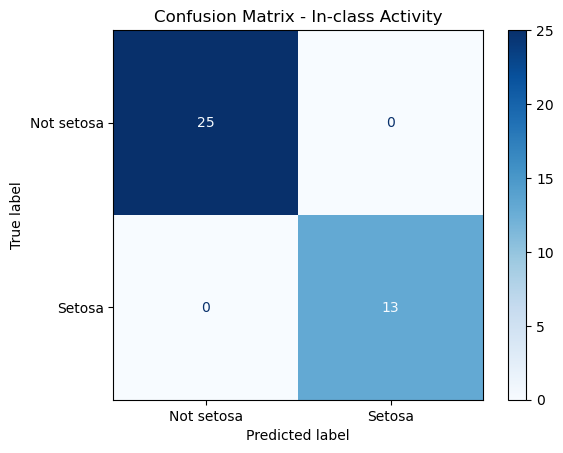

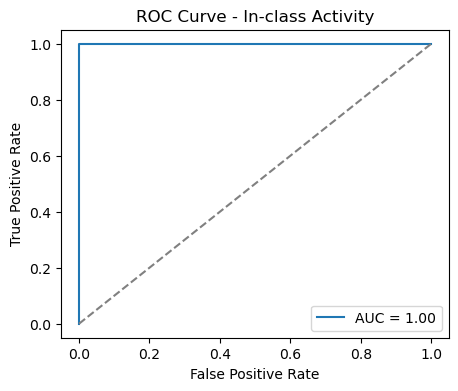

Summary metrics table:
 Accuracy  Precision  Recall  F1  FPR  AUC
      1.0        1.0     1.0 1.0  0.0  1.0

Interpretation notes:
- Accuracy shows overall correctness.
- Precision shows how often positive predictions are correct.
- Recall shows how many actual positives were captured.
- F1 balances precision and recall.
- FPR shows the rate of false alarms among negatives.
- AUC shows overall ranking ability across thresholds.


In [10]:

# Starter code for the in-class activity. Fill the TODOs.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, roc_auc_score
)

# 1. Load data and make it binary: setosa vs not setosa
iris = load_iris()
X_full = iris.data
y_full = iris.target

# TODO: create y_binary where setosa (class 0) is 1 and others are 0
y_binary = (y_full == 0).astype(int)  # example solution

# 2. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_binary, test_size=0.25, random_state=0, stratify=y_binary
)

# 3. Choose and train a classifier
# TODO: switch between LogisticRegression and DecisionTreeClassifier to compare
model = LogisticRegression(max_iter=1000)  # or DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

# 4. Predictions and confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not setosa","Setosa"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - In-class Activity")
plt.show()

# 5. Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr = cm[0,1] / (cm[0,1] + cm[0,0])

# 6. ROC and AUC using predicted probabilities
# Some classifiers provide predict_proba; if not, you can use decision_function outputs scaled to [0,1].
if hasattr(model, "predict_proba"):
    y_score = model.predict_proba(X_test)[:,1]
else:
    # Fallback using decision_function with min-max scaling
    if hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
        y_score = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)
    else:
        # If no scores available, use predictions as degenerate probabilities
        y_score = y_pred.astype(float)

fpr_vec, tpr_vec, _ = roc_curve(y_test, y_score)
auc_val = roc_auc_score(y_test, y_score)

plt.figure(figsize=(5,4))
plt.plot(fpr_vec, tpr_vec, label=f"AUC = {auc_val:.2f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - In-class Activity")
plt.legend()
plt.show()

# 7. Summary table
summary = pd.DataFrame([{
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1": f1,
    "FPR": fpr,
    "AUC": auc_val
}])
print("Summary metrics table:")
print(summary.round(3).to_string(index=False))

# 8. Interpretation
print("\nInterpretation notes:")
print("- Accuracy shows overall correctness.")
print("- Precision shows how often positive predictions are correct.")
print("- Recall shows how many actual positives were captured.")
print("- F1 balances precision and recall.")
print("- FPR shows the rate of false alarms among negatives.")
print("- AUC shows overall ranking ability across thresholds.")



## Wrap Up

- The confusion matrix is the foundation for evaluation.
- Accuracy, precision, recall, F1, and false positive rate tell complementary stories.
- Thresholds control the balance between precision and recall.
- ROC and AUC evaluate ranking quality across all thresholds.
- You practiced on a student dataset, a Titanic-style dataset, and a new binary task in the activity.
